<a href="https://colab.research.google.com/github/luizsdias/machine-learning-CA1/blob/main/LuizDias_ML_CA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

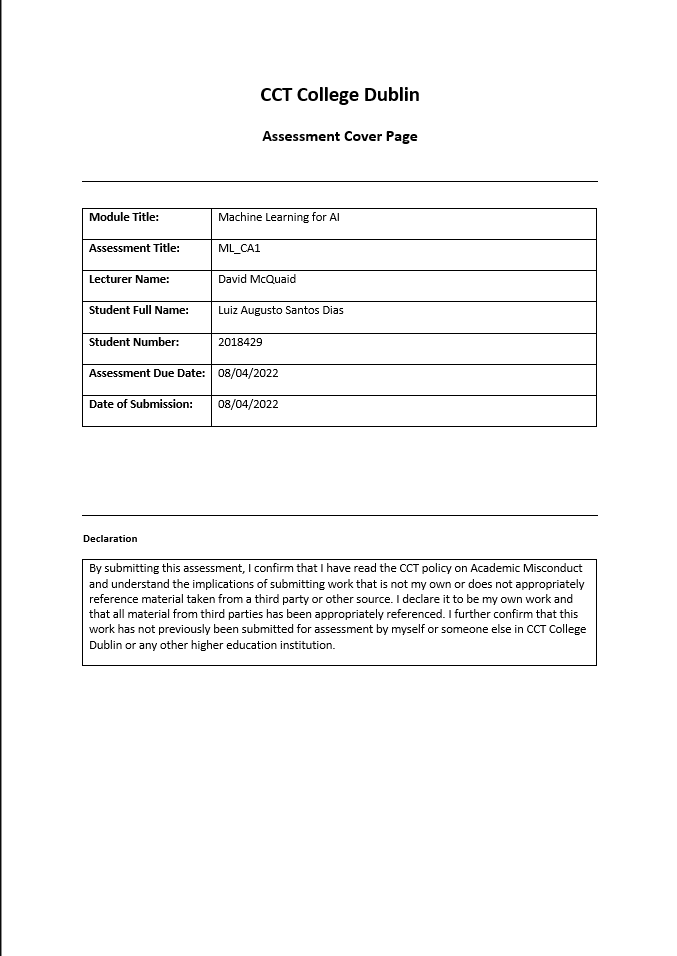

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## Importing the Dataset

In [2]:
df_columns = ['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
df = pd.read_csv("https://raw.githubusercontent.com/luizsdias/machine-learning-CA1/main/glass_data.csv", names=df_columns)

## Exploratory Data Analysis (EDA)

### Dataset dimension

In [3]:
df.shape

(214, 11)

### Dataset contents
<h4 align = "justify"> The .head() function returns the first 5 rows by default.</h4>

In [4]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


<h4 align = "justify"> The .tail() function returns the last 5 rows by default.</h4>

In [5]:
df.tail()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [6]:
df.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [7]:
df.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
df.columns

Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

In [9]:
df.nunique()

Id number        214
RI               178
Na               142
Mg                94
Al               118
Si               133
K                 65
Ca               143
Ba                34
Fe                32
Type of glass      6
dtype: int64

In [10]:
df['Type of glass'].unique()

array([1, 2, 3, 5, 6, 7])

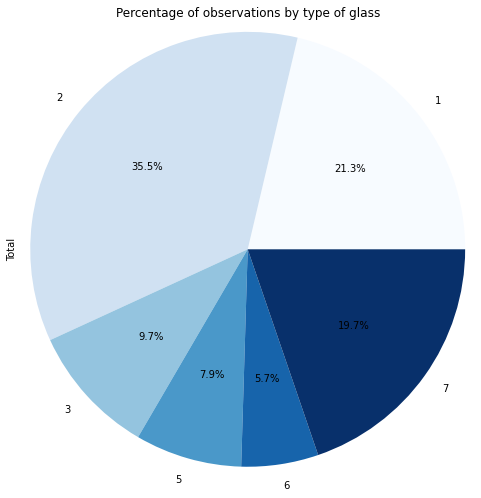

In [11]:
plt.figure(figsize =(10, 7))
df['Total'] = df.sum(axis=1)
df_type = df.groupby('Type of glass', axis = 0).sum()
df_type['Total'].plot(kind='pie', radius=1.2, autopct='%1.1f%%', cmap='Blues')
plt.title('Percentage of observations by type of glass')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


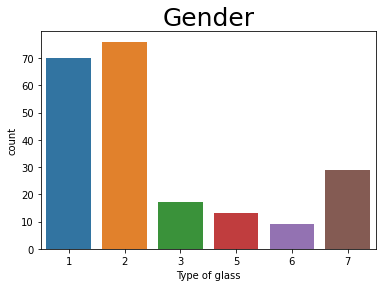

In [27]:
sns.countplot(df['Type of glass']).set_title('Gender', size=25)
plt.show()

<h3 align = "justify">Cleaning the dataset</h3>

In [13]:
df.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
Total            0
dtype: int64

In [14]:
#df.info()

In [15]:
df.drop('Id number', axis=1, inplace=True)

## Preparing the Data

In [17]:
features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
X = df[features]
y = df["Type of glass"]

In [18]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## K-Nearest Neighbours
<h4 align = "justify">The K-Nearest Neighbours algorithm is one of the simplest machine learning algorithms, it is a non-parametric method used for classification and regression. In KNN classification, the output is a class association, that is, when we use the KNN algorithm an object is classified according to its neighbours. Generally, the assigned class is the one that is most common among its k nearest neighbours.</h4>

In [38]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

prediction = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)

print('Prediction: ', prediction)
print('Accuracy: ', accuracy)

Prediction:  [2 1 1 2 7 1 6 3 2 1 2 5 1 1 3 7 7 1 2 2 2 1 2 1 2 2 2 1 1 2 2 3 6 2 1 7 2
 1 1 7 1 1 2]
Accuracy:  0.5116279069767442


Naive Bayes

In [21]:
nb = GaussianNB()

nb.fit(X_train, y_train)

prediction = nb.predict(X_test)
accuracy = nb.score(X_test, y_test)

print('Prediction: ', prediction)
print('Accuracy: ', accuracy)

Prediction:  [3 3 2 3 7 3 6 1 3 3 2 5 3 3 3 7 5 3 3 3 7 3 7 3 6 3 6 3 3 2 2 3 6 3 3 7 3
 3 1 7 3 3 2]
Accuracy:  0.37209302325581395


## Decision Tree

In [22]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6 2 0 0 0 0]
 [5 9 2 0 0 0]
 [1 3 0 0 0 0]
 [0 1 0 2 0 1]
 [0 4 0 0 0 0]
 [1 1 1 0 0 4]]
              precision    recall  f1-score   support

           1       0.46      0.75      0.57         8
           2       0.45      0.56      0.50        16
           3       0.00      0.00      0.00         4
           5       1.00      0.50      0.67         4
           6       0.00      0.00      0.00         4
           7       0.80      0.57      0.67         7

    accuracy                           0.49        43
   macro avg       0.45      0.40      0.40        43
weighted avg       0.48      0.49      0.46        43



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
classifier.predict([[1.51623, 14.92, 0.0, 2.02, 73.61, 0.00, 9.18, 1.59, 0.0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([7])